In [7]:
import pandas as pd
import json

In [8]:
def parse_json_lines(file_path):
    records = []
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                try:
                    entries = json.loads(line)
                    for entry in entries:
                        records.append({
                            'cdfkey': entry.get('CdfKey', ''),
                            'maxconf': entry.get('MaxConf', None)
                        })
                except json.JSONDecodeError as e:
                    print(f"Skipping invalid JSON line: {line}")
                    continue
    return pd.DataFrame(records)


In [9]:
df = parse_json_lines('samples/support0.000001_confidence0.75_eta0.7_other etas0.75,0.8,0.85,0.9.json')

In [10]:
df

,cdfkey,maxconf
0,bge-large_0.75,0.000440
1,bge-large_0.8,0.001143
2,bge-large_0.85,0.061613
3,bge-large_0.9,0.523556
4,bge-large_0.7,0.319864
...,...,...
4893,bge-large_0.8,0.072874
4894,bge-large_0.85,0.083465
4895,bge-large_0.9,0.083907
4896,bge-large_0.7,0.057634


In [14]:
# Cap maxconf values at 1
df['maxconf'] = df['maxconf'].clip(upper=1)

In [11]:
import matplotlib.pyplot as plt

In [35]:
def plot_distribution(key):
    # Filter by cdfkey
    filtered_df = df[df['cdfkey'] == key]
    
    print(len(filtered_df))
    
    # Plot histogram of maxconf
    plt.figure(figsize=(8, 5))
    plt.hist(filtered_df['maxconf'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribution of maxconf for cdfkey = ' + key)
    plt.xlabel('maxconf')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

696


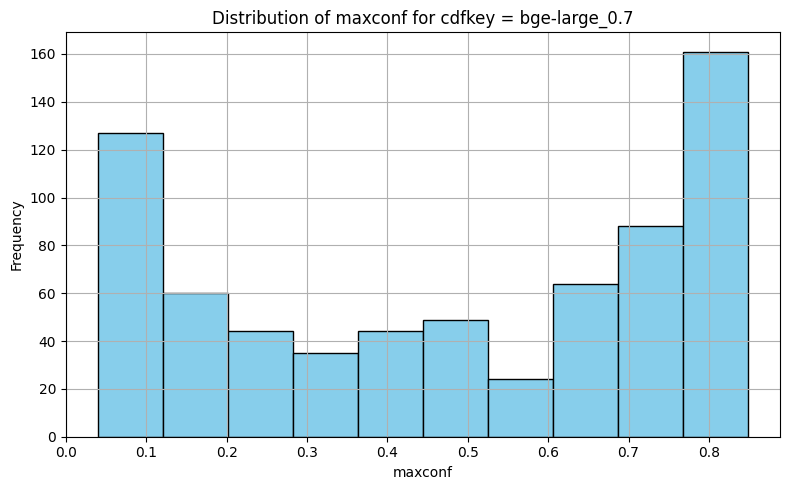

In [36]:
plot_distribution("bge-large_0.7")

696


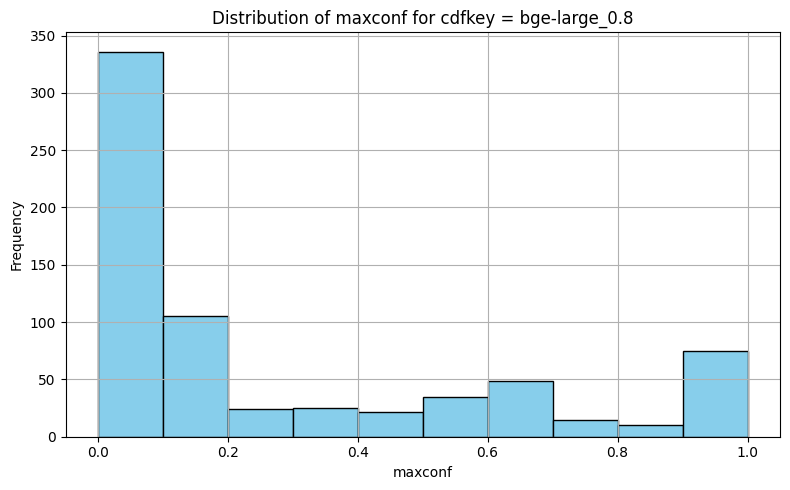

In [37]:
plot_distribution("bge-large_0.8")

696


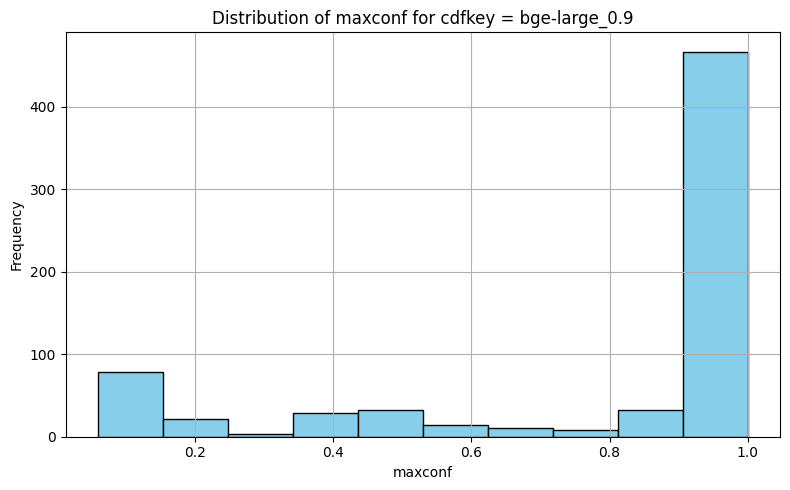

In [38]:
plot_distribution("bge-large_0.9")

In [39]:
df = parse_json_lines('samples/support0.000001_confidence0.85_eta0.7_other etas0.75,0.8,0.85,0.9.json')

df['maxconf'] = df['maxconf'].clip(upper=1)

696


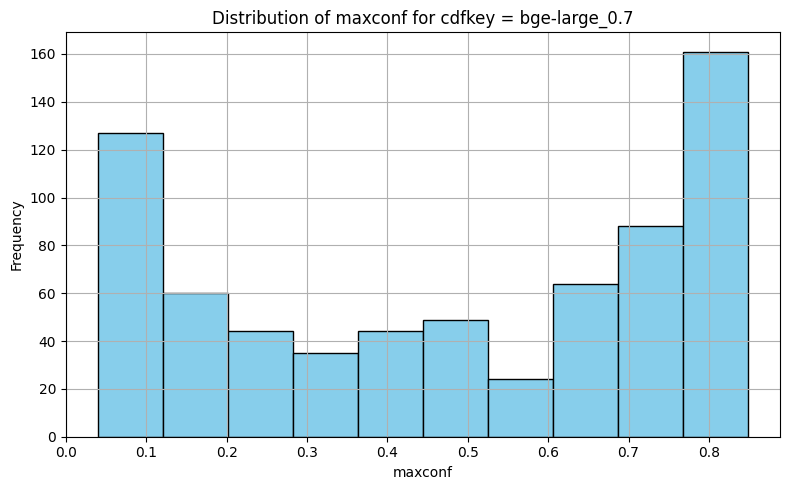

In [40]:
plot_distribution("bge-large_0.7")

696


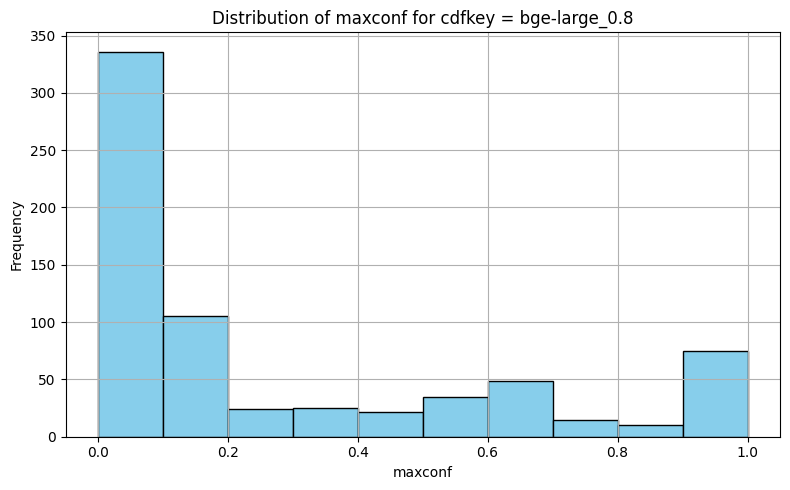

In [41]:
plot_distribution("bge-large_0.8")

696


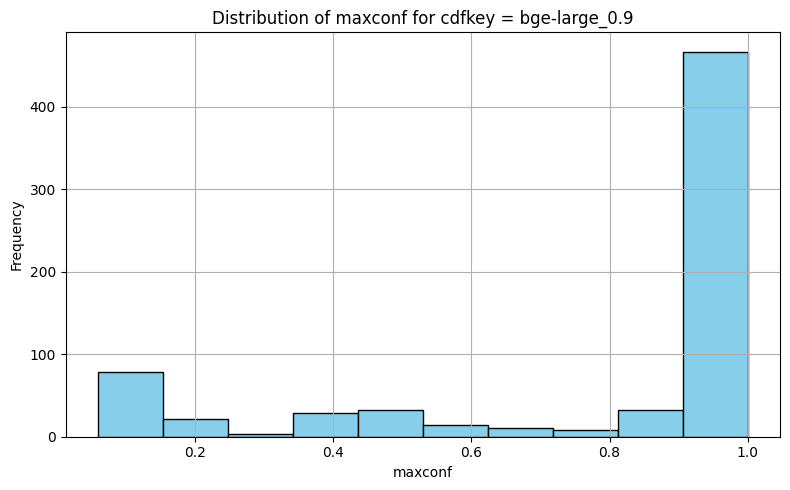

In [42]:
plot_distribution("bge-large_0.9")

696


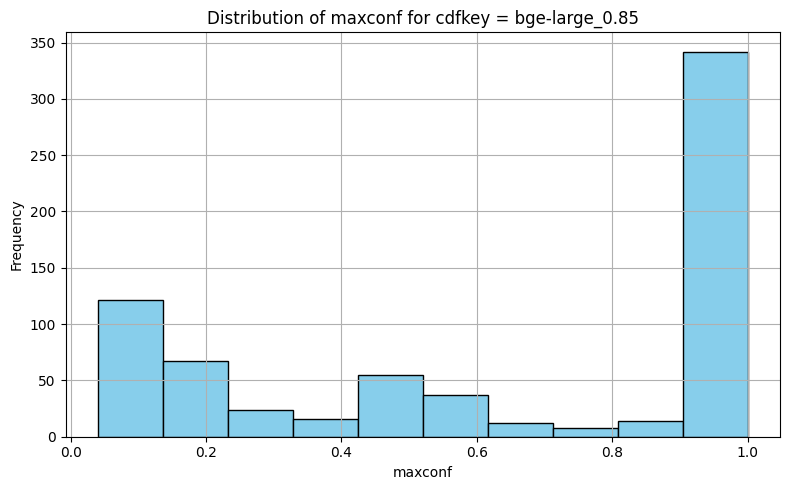

In [43]:
plot_distribution("bge-large_0.85")

In [45]:
df = parse_json_lines('samples/support0.000001_confidence0.8_eta0.9_other etas0.7,0.75,0.8,0.85.json')

df['maxconf'] = df['maxconf'].clip(upper=1)

363


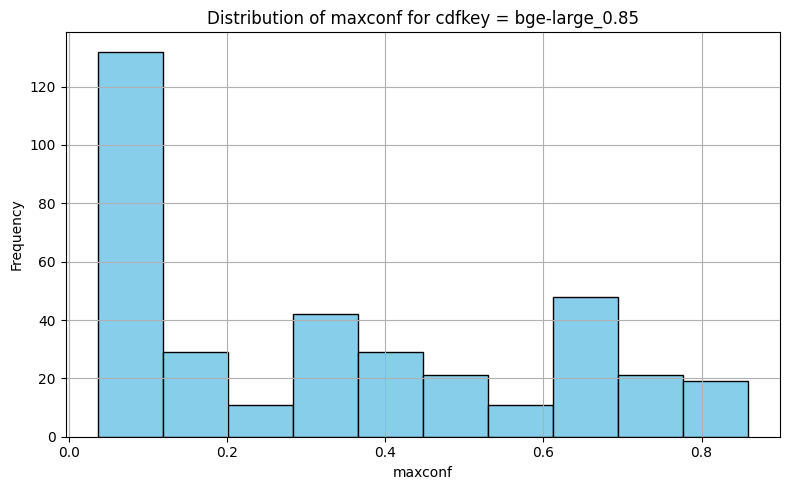

In [46]:
plot_distribution("bge-large_0.85")

363


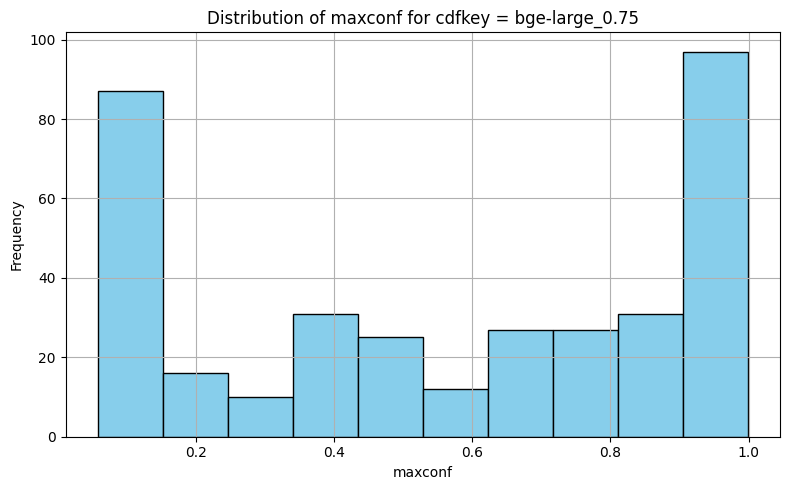

In [47]:
plot_distribution("bge-large_0.75")

363


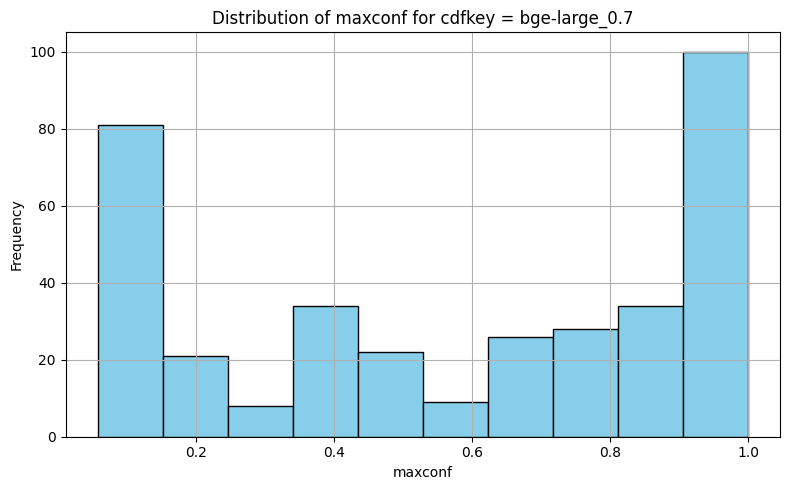

In [48]:
plot_distribution("bge-large_0.7")